In [12]:
# Tratamiento de datos
# -----------------------------------------------------------------------
import pandas as pd
import numpy as np
import random as rand
from tqdm import tqdm
import random as rand

# Visualizaciones
# -----------------------------------------------------------------------
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import tree

import sys
import os
src_path = "../../src/"
sys.path.append(src_path)
import support_modeling as sp

# Para realizar la regresión lineal y la evaluación del modelo
# -----------------------------------------------------------------------
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.ensemble import GradientBoostingRegressor

In [13]:
df=pd.read_pickle("../../results/cluster_1.pkl")
df

,Segment_Consumer,Segment_Corporate,Segment_Home Office,Market_APAC,Market_Africa,Market_Canada,Market_EMEA,Market_EU,Market_LATAM,Market_US,...,Category_Office Supplies,Category_Technology,Ship Mode,Order Priority,Sales_robust,Quantity_robust,Discount_robust,Profit_robust,Shipping Cost_robust,clusters_kmeans
0,1,0,0,1,0,0,0,0,0,0,...,0,1,2,1,23.119863,2.000000,0.5,24.372049,41.788214,1
1,1,0,0,1,0,0,0,0,0,0,...,0,0,0,2,23.436346,1.000000,0.0,26.420044,40.079650,1
2,0,1,0,0,0,0,0,0,0,1,...,1,0,0,0,22.705522,0.666667,1.0,50.779083,39.587477,1
3,0,1,0,1,0,0,0,0,0,0,...,0,0,2,2,20.625843,0.666667,0.0,17.079876,38.108656,1
4,0,0,1,0,0,0,0,0,1,0,...,0,0,2,3,9.703682,1.333333,0.0,16.396488,36.942910,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19661,0,1,0,0,0,0,0,1,0,0,...,0,0,2,2,19.432030,0.666667,0.0,7.921195,0.197514,1
21510,0,1,0,0,0,0,0,0,0,1,...,0,1,2,1,21.415513,-0.333333,1.0,9.382697,0.114641,1
35970,1,0,0,1,0,0,0,0,0,0,...,1,0,2,1,7.972381,1.000000,0.0,22.406446,-0.224678,1
38169,1,0,0,0,0,0,0,1,0,0,...,0,1,2,1,7.832012,1.333333,0.0,8.464854,-0.251842,1


In [14]:
df2=pd.read_pickle("../../results/cluster_sinencod_1.pkl")
df2

,Ship Mode,Segment,Market,Category,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority,clusters_kmeans
0,First Class,Consumer,APAC,Technology,5175.171,9,0.1,919.9710,915.49,Medium,1
1,Standard Class,Consumer,APAC,Furniture,5244.840,6,0.0,996.4800,878.38,High,1
2,Standard Class,Corporate,US,Office Supplies,5083.960,5,0.2,1906.4850,867.69,Low,1
3,First Class,Corporate,APAC,Furniture,4626.150,5,0.0,647.5500,835.57,High,1
4,Same Day,Home Office,LATAM,Furniture,2221.800,7,0.0,622.0200,810.25,Critical,1
...,...,...,...,...,...,...,...,...,...,...,...
19661,First Class,Corporate,EU,Furniture,4363.350,5,0.0,305.4000,12.14,High,1
21510,First Class,Corporate,US,Technology,4799.984,2,0.2,359.9988,10.34,Medium,1
35970,Same Day,Consumer,APAC,Office Supplies,1840.680,6,0.0,846.5400,2.97,Medium,1
38169,First Class,Consumer,EU,Technology,1809.780,7,0.0,325.7100,2.38,Medium,1


In [15]:
df=df.drop(columns=["clusters_kmeans","Profit_robust","Quantity_robust","Discount_robust"])

In [16]:
df["Sales_robust"]=df2["Sales"]

In [17]:
x=df.drop("Sales_robust",axis=1)
y=df[["Sales_robust"]]
x_train, x_test,y_train,y_test=train_test_split(x,y,train_size=0.8,random_state=42)

In [18]:
# Definir el grid de hiperparámetros
param_grid = {
    'n_estimators': [100, 200, 300], 
    'learning_rate': [0.01, 0.05, 0.1],  
    'max_depth': [3, 4, 5], 
    'min_samples_split': [5, 10, 20],  
    'min_samples_leaf': [2, 5, 10]  
}

# Configurar el GridSearchCV
model_GradientBoosting = GridSearchCV(
    GradientBoostingRegressor(random_state=42), 
    param_grid, 
    cv=5,  
    scoring='neg_mean_squared_error',  
    verbose=2,
    n_jobs=-1  
)

# Ajustar el modelo con el conjunto de entrenamiento reducido
print("\n Iniciando búsqueda de hiperparámetros con GridSearchCV...\n")
model_GradientBoosting.fit(x_train, y_train)

# Evaluar el modelo en el conjunto de validación
model_GradientBoostingRegressor = model_GradientBoosting.best_estimator_



 Iniciando búsqueda de hiperparámetros con GridSearchCV...

Fitting 5 folds for each of 243 candidates, totalling 1215 fits


C:\Users\alexc\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\numpy\ma\core.py:2846: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,
C:\Users\alexc\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\ensemble\_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


In [19]:
y_train_pred=model_GradientBoostingRegressor.predict(x_train)
y_test_pred=model_GradientBoostingRegressor.predict(x_test)

In [20]:
sp.metricas(y_train, y_train_pred, y_test, y_test_pred)

,r2_score,MAE,MSE,RMSE
Train,0.731100,339.729900,213560.966700,462.126600
Test,0.536900,423.786800,367964.297300,606.600600
Diferencia Train-Test,0.194200,-84.056900,-154403.330600,-144.474000
Porcentaje diferencia (%),7.657700,-5.504600,-13.275700,-6.759200
Rango valores,5296.590000,5296.590000,5296.590000,5296.590000
Ratio Rango (%),0.011970,7.207625,5489.619397,10.088823
Influencia dif rango (%),0.003700,1.587000,2915.146000,2.727700
Media,1612.093400,1612.093400,1612.093400,1612.093400
Ratio Media(%),0.039328,23.680908,18036.339086,33.147186
Influencia dif media (%),0.012000,5.214100,9577.815400,8.961900


El modelo tiene un ajuste razonable en entrenamiento, pero su desempeño en prueba refleja una caída en el R² y errores significativamente mayores, lo que indica cierto grado de sobreajuste. La diferencia es moderada y manejable, pero para mejorar la generalización del modelo se podrían considerar técnicas como la regularización o ajustes en la complejidad del modelo. Además, se recomienda explorar técnicas para reducir el impacto de outliers, dado el alto impacto del MSE en el conjunto de prueba.

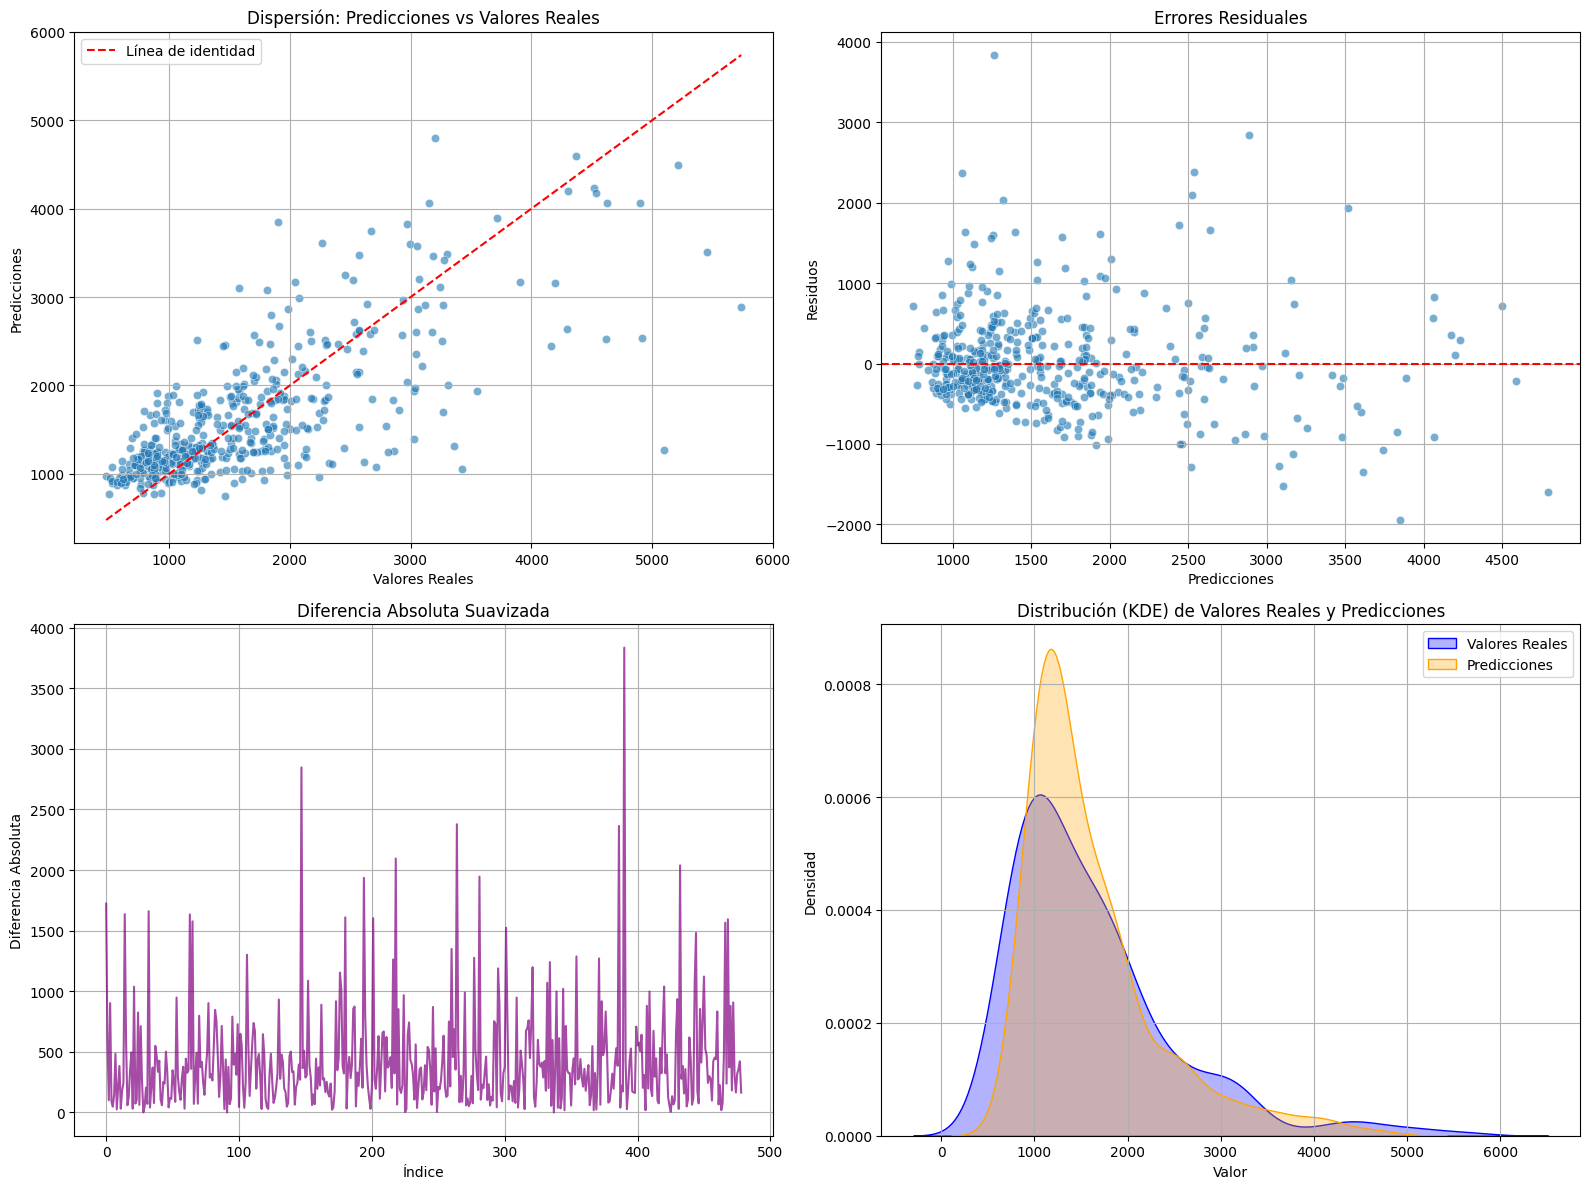

In [21]:
sp.comparativa_graficos(y_test, y_test_pred)

Gráfico superior izquierdo: Dispersión (Predicciones vs Valores Reales)
- Las predicciones están razonablemente alineadas con los valores reales para rangos bajos y medios, pero existe una tendencia a subestimar valores altos, como lo indica la desviación de los puntos por debajo de la línea de identidad. La dispersión es mayor a medida que los valores reales aumentan, mostrando dificultades del modelo en capturar patrones extremos.

Gráfico superior derecho: Errores Residuales
- Los residuales están distribuidos alrededor de cero, reflejando un buen desempeño general. Sin embargo, para valores más altos de las predicciones, los residuales muestran una mayor dispersión y subestimación, lo que indica inconsistencias del modelo para manejar datos extremos.

Gráfico inferior izquierdo: Diferencia Absoluta Suavizada
- Las diferencias absolutas son relativamente pequeñas en la mayoría de los puntos, pero destacan algunos picos significativos asociados a outliers o errores elevados en ciertas observaciones. Esto indica que el modelo tiene un rendimiento promedio sólido, pero los errores extremos deben ser analizados.

Gráfico inferior derecho: Distribución (KDE) de Valores Reales y Predicciones
- Las distribuciones de los valores reales y predichos son similares en términos generales, indicando que el modelo captura adecuadamente la tendencia global de los datos. Sin embargo, las predicciones tienen una densidad más alta en valores bajos y una menor densidad en valores altos, confirmando la tendencia a subestimar valores extremos.

In [22]:
import pickle

# Guardar el modelo entrenado
with open('../../models/model_GradientBoostingRegressor_cluster_1.pkl', 'wb') as file:
    pickle.dump(model_GradientBoostingRegressor, file)